In [1]:
import proj1_helpers as helper
import implementations as imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boson is -1

not boson is 1

In [2]:
ls

0_8_accuracy_poly_5.csv               implementations.py
LICENSE                               proj1_helpers.py
README.md                             project1_description.pdf
Sandbox.ipynb                         scripts/
__pycache__/                          shortened_eigenvalues_submission.csv
basic_poly_enhancement_9.csv          test.csv
dummy_submission.csv                  train.csv


In [3]:
y_train, x_train, ids_train = helper.load_csv_data('train.csv')
y_test, x_test, ids_test = helper.load_csv_data('test.csv')
print(x_train.shape)
print(x_test.shape)

(250000, 30)
(568238, 30)


In [4]:
print('Number of boson:', np.count_nonzero(y_train-1))
print('Number of other:', np.count_nonzero(y_train+1))

Number of boson: 164333
Number of other: 85667


In [5]:
def col_standardize(x):
    means = [np.mean(col) for col in x.T]
    stds = [np.std(col) for col in x.T]
    return (x - means) / stds

In [6]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [7]:
std_x_train = standardize(x_train)
std_x_test = standardize(x_test)

In [8]:
col_std_x_train = col_standardize(x_train)
col_std_x_test = col_standardize(x_test)

### Raw least squares (score: ?)

In [75]:
(w, loss) = imp.least_squares(y_train, x_train)
loss

0.3396868095519065

### Std least squares (score: 0.73)

In [76]:
(w, loss) = imp.least_squares(y_train, col_std_x_train)
loss

0.38895231495581328

In [77]:
(w, loss) = imp.least_squares(y_train, std_x_train)
loss

0.33944681722221454

### Eigenvalues reduction (score: 0.62)

In [221]:
std_x_train = standardize(x_train)

In [222]:
u, s, v = np.linalg.svd(std_x_train, full_matrices=False)
print('u shape:', u.shape)
print('s shape:', s.shape)
print('v shape:', v.shape)

u shape: (250000, 30)
s shape: (30,)
v shape: (30, 30)


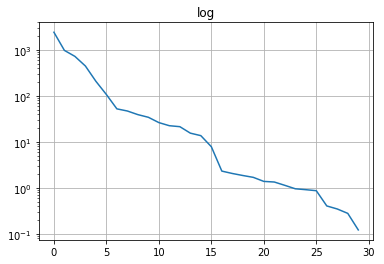

In [223]:
plt.plot(s)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.show()

In [224]:
shortened_x_train = u[:, :23] @ np.diag(s[:23]) @ v[:23,:]

In [225]:
shortened_x_train.shape

(250000, 30)

In [228]:
(w, loss) = imp.least_squares(y_train, x_train)

In [229]:
loss

0.3396868095519065

In [230]:
y_pred = helper.predict_labels(w, x_test)

In [231]:
print('Number of boson:', np.count_nonzero(y_pred+1))
print('Number of other:', np.count_nonzero(y_pred-1))

Number of boson: 142766
Number of other: 425472


In [26]:
helper.create_csv_submission(ids_test, y_pred, 'shortened_eigenvalues_submission.csv')

In [87]:
unique_values_per_column_count = [len(set(col)) for col in train_data.T]

In [ ]:
unique_values_per_column_count

In [ ]:
def y_map(y):
    if y == -1:
        return 0
    else:
        return 0.2

y_train_mapped = np.vectorize(y_map)(y_train)

### PCA

In [269]:
square_train_data = std_x_train.T @ std_x_train

In [270]:
w, v = np.linalg.eigh(square_train_data)

In [271]:
print(w.shape[0])
print(v.shape)

30
(30, 30)


In [272]:
w

array([  1.47023702e-02,   7.69904792e-02,   1.19512622e-01,
         1.62071296e-01,   7.46056491e-01,   8.25085699e-01,
         9.03334413e-01,   1.27612516e+00,   1.77864555e+00,
         1.89096064e+00,   2.83470776e+00,   3.41290705e+00,
         4.17934637e+00,   5.30623047e+00,   6.09074351e+01,
         1.84445983e+02,   2.37029041e+02,   4.53246006e+02,
         4.99047439e+02,   6.81746638e+02,   1.15966106e+03,
         1.51412234e+03,   2.17545223e+03,   2.69620704e+03,
         1.13326956e+04,   4.25931171e+04,   1.96837435e+05,
         5.16289282e+05,   9.39783924e+05,   5.78347816e+06])

In [273]:
def keep_variance(percentage, vec):
    r = list(range(1, w.shape[0] + 1))
    total = np.sum(vec)
    sums = list(map(lambda i: np.sum(vec[-i:]), r))
    ratio = sums / total
    return np.argmin(abs(ratio - percentage)) + 1

In [274]:
index_keeper = keep_variance(0.9, w)
print(index_keeper)

2


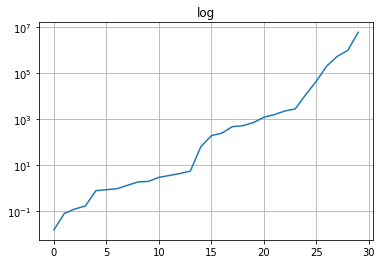

In [275]:
plt.plot(w)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.show()

In [276]:
filtered_v = v[:,-index_keeper:]

In [277]:
filtered_v.shape

(30, 2)

In [278]:
project_x_train = std_x_train @ filtered_v

In [344]:
tupled_boson = np.array(list(zip(*filter(lambda pair: pair[1] == -1, zip(project_x_train.tolist(), y_train))))[0])
tupled_other = np.array(list(zip(*filter(lambda pair: pair[1] == 1, zip(project_x_train.tolist(), y_train))))[0])

In [345]:
tupled_boson.shape

(164333, 2)

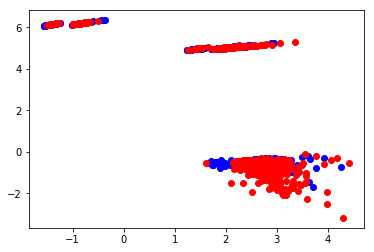

In [348]:
plt.plot(tupled_boson[1000:2000, :1], tupled_boson[1000:2000, 1:], 'bo')
plt.plot(tupled_other[1000:2000, :1], tupled_other[1000:2000, 1:], 'ro')
plt.show()

In [219]:
(weight, loss) = imp.least_squares(y_train, project_x_train)

In [220]:
loss

0.40112273670576726

In [205]:
y_pred = helper.predict_labels(weight, std_x_test @ filtered_v)

In [213]:
print('Number of boson:', np.count_nonzero(y_pred+1))
print('Number of other:', np.count_nonzero(y_pred-1))

Number of boson: 32640
Number of other: 535598


### Polynomial feature

In [9]:
np.array(range(2))

array([0, 1])

In [10]:
def polynomial_enhancement(x, deg):
    stacked_x = np.tile(x, deg+1)
    power_vec = np.repeat(np.array(range(deg+1)), x.shape[1])
    return stacked_x ** power_vec

In [11]:
enhanced_col_std_x_train = polynomial_enhancement(std_x_train, 9)
enhanced_col_std_x_test = polynomial_enhancement(std_x_test, 9)
enhanced_col_std_x_train.shape

(250000, 300)

In [12]:
def pseudo_least_squares(y, x):
    U, S, V = np.linalg.svd(x, full_matrices=False)
    w = V.T @ np.diag(1/S) @ U.T @ y
    loss = imp.mse(y, x, w)
    return (w, loss)

In [13]:
(w, loss) = pseudo_least_squares(y_train, enhanced_col_std_x_train)
loss

0.28237132279486454

In [14]:
y_pred = helper.predict_labels(w, enhanced_col_std_x_test)

In [15]:
helper.create_csv_submission(ids_test, y_pred, 'basic_poly_enhancement_9.csv')

#### Cross validation

In [9]:
acc, loss_train, loss_test, w = imp.cross_validation_v2(y_train, std_x_train, 10, imp.pseudo_least_squares, 5)

In [13]:
acc

[0.79276,
 0.79736,
 0.79624,
 0.79476,
 0.79692,
 0.7956,
 0.79392,
 0.79764,
 0.79588,
 0.7948]

In [12]:
enhanced_col_std_x_test = imp.polynomial_enhancement(std_x_test, 5)

In [13]:
y_pred = helper.predict_labels(w, enhanced_col_std_x_test)

In [14]:
helper.create_csv_submission(ids_test, y_pred, '0_8_accuracy_poly_5.csv')

In [16]:
test = []

test.append(1)
test

[1]

In [ ]:
acc, loss_train, loss_test, w = imp.cross_validation_v2(y_train, std_x_train, 10, imp.pseudo_least_squares, 5)